Rank the sensors according to their importance/predictive power in descending order
with respect to the class labels of the samples.

Importing the necessary modules. 

In [5]:
import os,numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.ensemble import RandomForestClassifier

Changing csv file directory and importing the file to a pandas DataFrame. 

In [7]:
os.chdir('E://Datasets//Sensor//task') # swithcing the directory to path sepecified.
os.listdir()

['task_data.csv', 'task_description.txt']

In [8]:
sensor = pd.read_csv(os.path.join(os.getcwd(),'task_data.csv'),header=0) # reading task_data.csv

In [9]:
sensor.head() # the file with all the features is loaded correctly with headers.

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [23]:
# dropping the sample index as we won't need it for this task. 
sensor.drop('sample index',axis=1,inplace=True)

KeyError: "['sample index'] not found in axis"

In [25]:
sensor.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
class_label    400 non-null float64
sensor0        400 non-null float64
sensor1        400 non-null float64
sensor2        400 non-null float64
sensor3        400 non-null float64
sensor4        400 non-null float64
sensor5        400 non-null float64
sensor6        400 non-null float64
sensor7        400 non-null float64
sensor8        400 non-null float64
sensor9        400 non-null float64
dtypes: float64(11)
memory usage: 34.5 KB


There are no null values. so we can proceed to description statistics on our sensor dataframe

In [22]:
sensor.describe() 

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


Based on the above data each feature seems to fit a normal distribution with the data spread

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

## 

In [20]:
corr = sensor.corr()

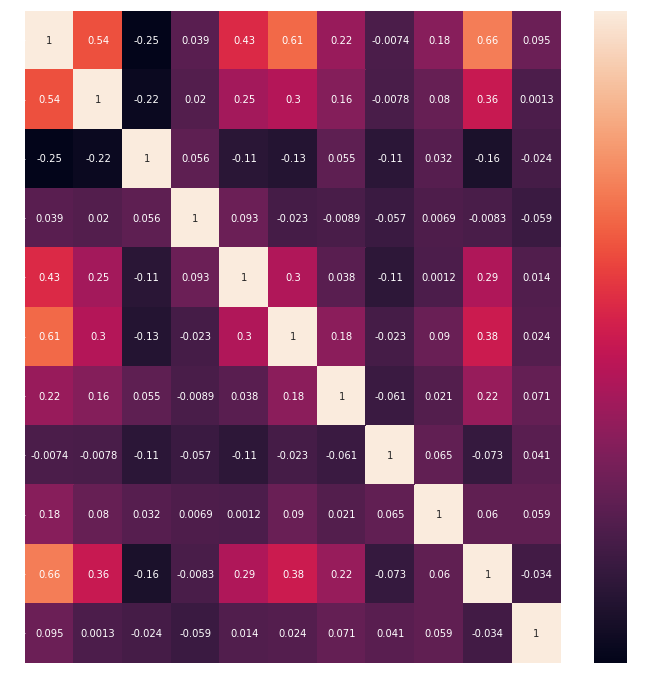

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

In [ ]:
sns.relplot(x='sensor4',y='sensor8',hue='class_label',data=sensors)

In [ ]:
sensors.class_label.value_counts()

In [ ]:
sensor.describe()

Not necessary to scale as the data is already scaled. 

In [ ]:
x = sensors.iloc[:,1:]
y = sensors.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=46)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

In [ ]:
split = StratifiedKFold(n_splits=8,random_state=46)
for train_index,test_index in split.split(x,y):
    sx_train, sy_train = x.iloc[train_index], y.iloc[train_index]
    sx_test, sy_test = x.iloc[test_index], y.iloc[test_index]
print(sx_train.shape,sy_train.shape)
print(sx_test.shape,sy_test.shape)

In [ ]:
forest_clf = RandomForestClassifier(random_state=46)

In [ ]:
forest_clf.fit(sx_train,sy_train)

In [ ]:
y_pred = forest_clf.predict(sx_test)

In [ ]:
sum(sy_test == y_pred) / len(sy_test)

In [ ]:

pipe = Pipeline([
                 ('poly',PolynomialFeatures(degree=2,include_bias=True)),
                 ('scalar',StandardScaler()),
                  ('sdg',SGDClassifier(loss='log',verbose=0))
])

In [ ]:
pipe.fit(sx_train,sy_train)

In [ ]:
y_pred = pipe.predict(sx_test)

In [ ]:
sum(sy_test == y_pred)/len(sy_test)

In [ ]:
cross_val_score(pipe,sx_train,sy_train,scoring='accuracy',cv=8,n_jobs=-1)

In [ ]:
forest_clf.get_params().keys()

In [ ]:
params = [{'n_estimators':np.arange(1,20),
          'class_weight':['balanced','balanced_subsample',None],
          'max_features':np.arange(3,10),
          'max_depth':None,
           'min_samples_split':np.arange(2,5)
          }]

In [ ]:
estimator = GridSearchCV(forest_clf,params,scoring='accuracy',n_jobs=-1,
                         cv=5,return_train_score=True)

In [ ]:
estimator.fit(sx_train,sy_train)

In [ ]:
estimator.best_estimator_

In [ ]:
estimator.best_params_

In [ ]:
cross_val_score(estimator.best_estimator_,sx_train,sy_train,scoring='accuracy',cv=5)

In [ ]:
estimator.best_estimator_.fit(sx_train,sy_train)

In [ ]:
y_pre = estimator.best_estimator_.predict(sx_test)

In [ ]:
sum(sy_test == y_pre) /len(sy_test)

In [ ]:
estimator.best_estimator_.feature_importances_

In [ ]:
indicies = np.argsort(estimator.best_estimator_.feature_importances_)[::-1]

In [ ]:
[x.columns[i] for i in indicies]

In [ ]:
x.columns,estimator.best_estimator_.feature_importances_

In [ ]:
forest_clf.fit(x_train[['sensor6','sensor4']],y_train)

In [ ]:
y_p = forest_clf.predict(x_test[['sensor6','sensor4']])

In [ ]:
sum(y_test == y_p) / len(y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(x_train[['sensor6','sensor4']],y_train)

In [ ]:
y_pred = knn.predict(x_test[['sensor6','sensor4']])

In [ ]:
sum(y_test == y_pred) / len(y_test)